In [76]:
from datascience import *
import numpy as np
%matplotlib inline

---

- ### t.apply(function, columns)
    - #### 열의 각 요소를 함수 호출의 결과로 변경한 새 배열을 생성

<br>

In [2]:
ages = Table().with_columns("Person", make_array("A", "B", "C", "D", "E", "F"),
                     "Age", make_array(17, 117, 52, 100, 6, 101))
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


- #### 100보다 큰 값을 제한하는 배열 생성

In [5]:
cut_off_age = ages.apply(lambda x: min(x, 100), "Age")
cut_off_age

array([ 17, 100,  52, 100,   6, 100], dtype=int64)

- #### 제한 값을 적용한 열 추가

In [6]:
ages.with_column("Cut Off Age", cut_off_age)

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


---

- ### t.group(column, collect=None)
    - #### collect
        - #### None: 카테고리의 개수
        - #### sum(np.sum): 모든 카테고리 합산
        - #### max(np.max): 모든 카테고리의 최대값

<br>

- ### 1. 단일 변수에 따른 entry 분류

In [20]:
nba_salaries = Table.read_table("./csv/nba_salaries.csv")
nba_salaries.show(3)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625


- #### 각 팀 별 선수들의 급여

In [18]:
nba_salaries.group("TEAM", np.sum).show(3)

TEAM,PLAYER sum,POSITION sum,2015-2016 SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307


In [19]:
nba_salaries.group("TEAM", np.sum).select(make_array("TEAM", "2015-2016 SALARY sum")).show(3)

TEAM,2015-2016 SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307


- #### 다섯 포지션 별 선수의 수

In [22]:
nba_salaries.group("POSITION")

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


- #### 다섯 포지션 별 선수들의 평균 연봉

In [23]:
nba_salaries.group("POSITION", np.mean)

POSITION,PLAYER mean,TEAM mean,2015-2016 SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


In [24]:
nba_salaries.group("POSITION", np.mean).drop(make_array("PLAYER mean", "TEAM mean"))

POSITION,2015-2016 SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


<br>

- ### 2. 여러 변수에 따른 entry 분류

In [25]:
more_cons = Table().with_columns(
    "Flavor", make_array("strawberry", "chocolate", "chocolate", "strawberry", "chocolate", "bubblegum"),
    "Color", make_array("pink", "light brown", "dark brown", "pink", "dark brown", "pink"),
    "Price", make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)
more_cons

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


- #### 맛과 색상 두 변수에 따른 개수

In [26]:
more_cons.group(make_array("Flavor", "Color"))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


- #### 맛과 색상 두 변수에 따른 전체 가격 추출

In [29]:
more_cons.group(make_array("Flavor", "Color"), np.sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


---

- ### t.pivot(column, row, values=None, collect=None, zero=None)
    - #### 분할 표 생성
    - #### values: 표의 값으로 사용할 Label
    - #### zero: 존재하지 않는 쌍에 사용할 기본 값

<br>

- #### 맛과 색상 두 변수에 따른 개수 추출

In [30]:
more_cons.pivot("Flavor", "Color")

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


- #### 맛과 색상 두 변수에 따른 전체 가격 추출

In [32]:
more_cons.pivot("Flavor", "Color", "Price", np.sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


---

- ### t.join(column_label, other, other_label)
    - #### 같은 entry에 대한 데이터가 두 개의 테이블에 있는 경우 합쳐서 새 테이블 생성
    - #### 겹치는 항목만 새 테이블에 포함함

<br>

In [47]:
cones = Table().with_columns(
    "Flavor", make_array("strawberry", "vanila", "chocolate", "strawberry", "chocolate", "mint"),
    "Price", make_array(3.55, 4.75, 6.55, 5.25, 5.75, 6.25)
)
cones

Flavor,Price
strawberry,3.55
vanila,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75
mint,6.25


In [52]:
reviews = Table().with_columns(
    "Kind", make_array("vanila", "chocolate"),
    "Stars", make_array(5, 3)
)
reviews

Kind,Stars
vanila,5
chocolate,3


- #### 같은 Entry에 대한 Price와 Stars를 한 테이블에 표현

In [53]:
cones.join("Flavor", reviews, "Kind")

Flavor,Price,Stars
chocolate,6.55,3
chocolate,5.75,3
vanila,4.75,5


---

- ### Example 2

<br>

In [54]:
educ_inc = Table.read_table("./csv/educ_inc.csv")
educ_inc.show(4)

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981


- #### 2014년의 18세 이상의 주민만 추출하여 분석

In [57]:
educ_inc = educ_inc.where("Year", are.containing("14 ")).where("Age", are.not_equal_to("00 to 17"))
educ_inc.show(4)

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122


- #### Educational Attainment, Personal Income, Population Count 열만 추출

In [60]:
educ_inc = educ_inc.select(make_array("Educational Attainment", "Personal Income", "Population Count"))
educ_inc.show(4)

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122


- #### 교육 수준에 따른 인구수 합계

In [64]:
educ_pop = educ_inc.group("Educational Attainment", np.sum).drop("Personal Income sum")
educ_pop

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


- #### 인구 비율 추가한 테이블 생성

In [70]:
all_count = np.sum(educ_pop.column("Population Count sum"))
percent = educ_pop.apply(lambda x: x / all_count, "Population Count sum")
percent = np.round(percent * 100, 2)
percent

array([ 31.75,  28.96,  23.44,  15.86])

In [72]:
educ_pop = educ_pop.with_column("Percent", percent)
educ_pop

Educational Attainment,Population Count sum,Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


<br>

- #### 교육 수준과 개인 소득을 기준으로 교차 분류된 테이블 생성

In [80]:
educ_inc_pivot = educ_inc.pivot("Educational Attainment", "Personal Income", "Population Count", sum)
educ_inc_pivot

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


- #### 백분율로 표시한 테이블 생성

In [91]:
def percents(array_x):
    return np.round((array_x / sum(array_x)) * 100, 2)

cols = []
for col in educ_inc_pivot.labels[1:]:
    cols.append([col, percents(educ_inc_pivot.column(col))])

percent_table = Table().with_column("Personal Income", educ_inc_pivot.column("Personal Income"))
for col, arr in cols:
    percent_table = percent_table.with_column(col, arr)
percent_table

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


- #### 학사 학위 이상과 고교 졸업장이 없는 주민 대상 barh 그래프

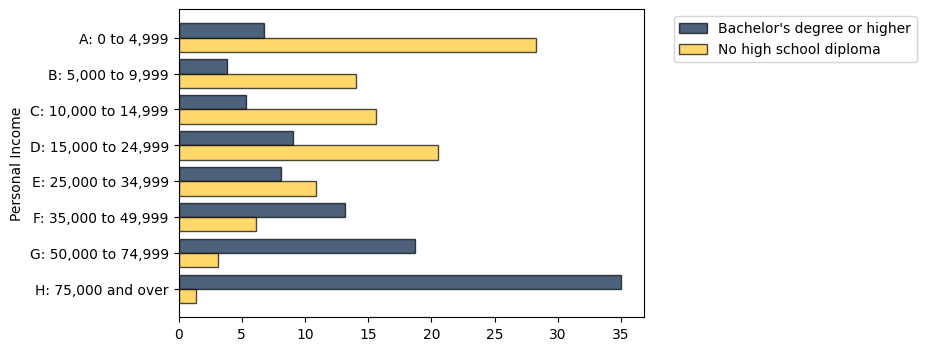

In [94]:
percent_table.barh("Personal Income", make_array("Bachelor's degree or higher", "No high school diploma"))